# As we know, it's a Health Insurance Lead Prediction,

To begin with i have imported some basic libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score

# here storing the data into pandas

In [2]:
train = pd.read_csv('train_Df64byy.csv')
test = pd.read_csv('test_YCcRUnU.csv')
sub = pd.read_csv('sample_submission_QrCyCoT.csv')

In [3]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [6]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [7]:
train.shape,  test.shape

((50882, 14), (21805, 13))

In [8]:
def download_preds(preds_test, file_name = 'sub.csv'):
    
    ## 1. Setting the target column with our obtained predictions
    sub['Response'] = preds_test
    ## 2. Saving our predictions to a csv file
    sub.to_csv(file_name, index = False)

In [9]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [10]:
sub.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


# After all this Data Exploring we get to know,
        In train dataset(50882, 10).
        In test dataset(21805, 9).
        We can see the null values in
               Health Indicator           11691
               Holding_Policy_Duration    20251
               Holding_Policy_Type        20251
        

# Data PreProcessing 
Filling the null values
Droping the irrelevant feature
Converting the categorical feature into numberic becouse of the model performance



In [11]:
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].median())
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mode()[0])
train['Health Indicator'] = train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])


test['Holding_Policy_Type'] = test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].median())
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mode()[0])
test['Health Indicator'] = test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])

In [12]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [13]:
train.drop(['ID','City_Code', 'Region_Code'],axis=1,inplace=True)
test.drop(['ID','City_Code', 'Region_Code'],axis=1,inplace=True)

In [14]:
train.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [15]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].replace(('14+'),('14.0'))
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].replace(('14+'),('14.0'))

train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].astype(float)
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].astype(float)

In [16]:
train['Health Indicator'] =train['Health Indicator'].replace(('X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'),
                                                             (1,2,4,3,6,5,8,7,9))
test['Health Indicator'] =test['Health Indicator'].replace(('X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'),
                                                             (1,2,4,3,6,5,8,7,9))

In [17]:
train=pd.get_dummies(data=train,drop_first=True)
train.head()

,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,36,36,1,14.0,3.0,22,11628.0,0,1,0,0
1,75,22,2,1.0,3.0,22,30510.0,0,0,1,0
2,32,32,1,1.0,1.0,19,7450.0,1,0,0,0
3,52,48,1,14.0,3.0,19,17780.0,0,0,1,0
4,44,44,2,3.0,1.0,16,10404.0,0,1,0,0


In [18]:
test=pd.get_dummies(data=test,drop_first=True)
test.head()

,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,30,30,1,6.0,3.0,5,11934.0,0,0,0
1,69,68,1,3.0,3.0,18,32204.8,0,1,1
2,28,28,3,2.0,4.0,17,9240.0,1,0,0
3,23,23,3,3.0,3.0,18,9086.0,1,0,0
4,75,75,3,14.0,3.0,5,22534.0,0,0,0


In [19]:
 from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
 for i in var_mod:
        train[i] = le.fit_transform(train[i])
        test[i] = le.fit_transform(test[i])

# Visualization of data
For better Understanding of data
For viewing the data and comparison

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Response', ylabel='count'>

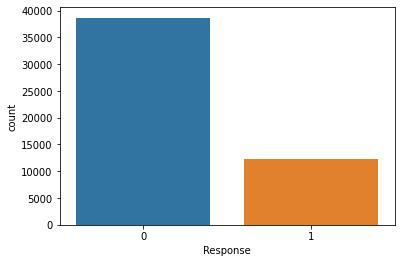

In [20]:
import seaborn as sns
sns.countplot(train['Response'])

# Visualizing the data from seaborn (heatmap)
Cause of this we can understand the correlation between features and it's strength 

<AxesSubplot:>

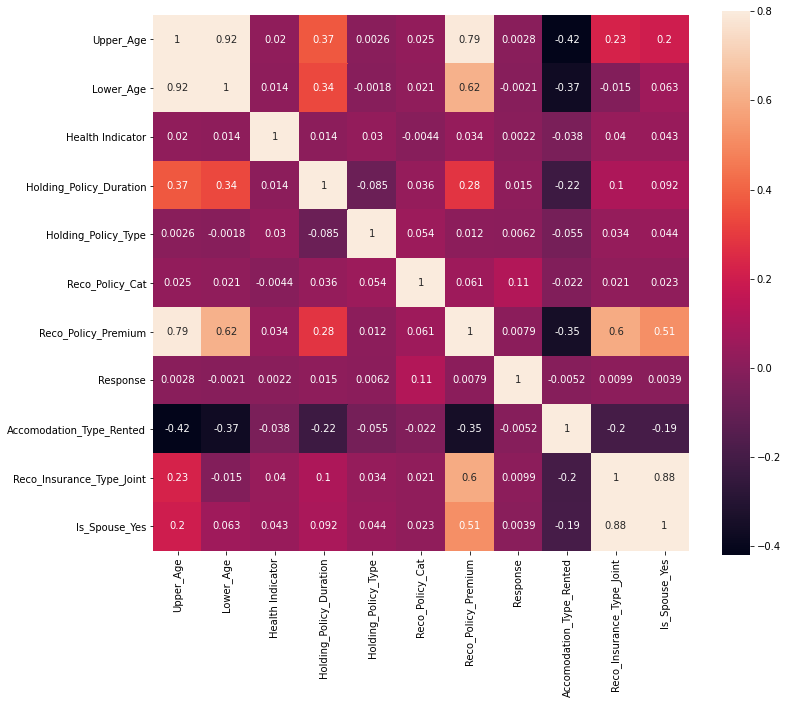

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), vmax=.8, square=True,annot=True)

<AxesSubplot:>

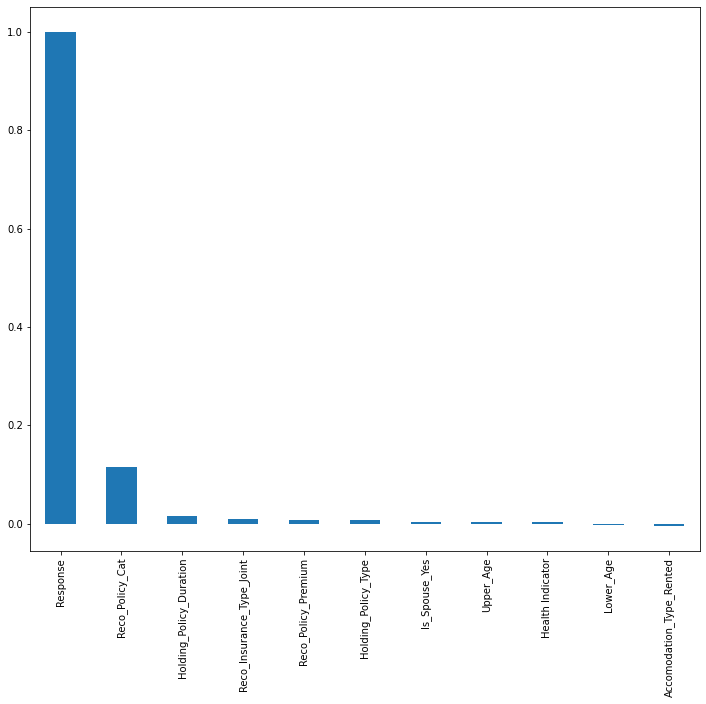

In [22]:
corr_matrix = train.corr()
plt.figure(figsize=(12,10))
corr_matrix['Response'].sort_values(ascending=False).plot(kind='bar')

In [23]:
corr_matrix = abs(train.corr())
print(corr_matrix["Response"].sort_values(ascending=False)) 

Response                     1.000000
Reco_Policy_Cat              0.114321
Holding_Policy_Duration      0.015047
Reco_Insurance_Type_Joint    0.009891
Reco_Policy_Premium          0.007943
Holding_Policy_Type          0.006208
Accomodation_Type_Rented     0.005201
Is_Spouse_Yes                0.003859
Upper_Age                    0.002772
Health Indicator             0.002239
Lower_Age                    0.002099
Name: Response, dtype: float64


# Here, we get to know how less correlated some feature in numeric way
We can drop them

train = train.drop('Lower_Age',axis=1)
test = test.drop('Lower_Age',axis=1)

In [24]:
train.head()

,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,36,36,1,14.0,3.0,22,11628.0,0,1,0,0
1,75,22,2,1.0,3.0,22,30510.0,0,0,1,0
2,32,32,1,1.0,1.0,19,7450.0,1,0,0,0
3,52,48,1,14.0,3.0,19,17780.0,0,0,1,0
4,44,44,2,3.0,1.0,16,10404.0,0,1,0,0


In [25]:
test.head()

,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,30,30,1,6.0,3.0,5,11934.0,0,0,0
1,69,68,1,3.0,3.0,18,32204.8,0,1,1
2,28,28,3,2.0,4.0,17,9240.0,1,0,0
3,23,23,3,3.0,3.0,18,9086.0,1,0,0
4,75,75,3,14.0,3.0,5,22534.0,0,0,0


# Now,that we have all the feature in numeric 
Splitting the dependent and independent feature into X,y.
X independent feature
y dependent feature


In [26]:
X = train.drop(['Response'],axis=1)
y = train.Response

# Importing train test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Now Building the Model

In [35]:
from xgboost import XGBClassifier
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.03,  
                      colsample_bytree = 0.3,
                      subsample = 0.6,
                      objective='binary:logistic', 
                      n_estimators=3600, 
                      reg_alpha = 0.3,
                      max_depth=7, 
                      gamma=10)
model.fit(X_train, y_train)

c:\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3600, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, silent=False,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred = model.predict_proba(X_test)
y_pred


array([[0.87306917, 0.12693082],
       [0.99384665, 0.00615337],
       [0.81017435, 0.18982567],
       ...,
       [0.73016   , 0.26984   ],
       [0.7728664 , 0.22713357],
       [0.7138102 , 0.28618982]], dtype=float32)

In [37]:
print(model.score(X_test,y_test))

0.754471012119227


In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred[:,1])

0.6445184705451166

# Saving the file into csv format 

In [40]:
preds_test = model.predict_proba(test)[:,1] 
download_preds(preds_test, file_name='jobFinal64.csv')